# Importing the important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

# Loading the Excel or CSV files of the dataset

In [136]:
data = pd.read_excel("AirQualityUCI.xlsx")

## Checking the shape of the data

In [137]:
data.shape

(9357, 15)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [139]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [140]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


## Pre-processing the data

### Checking if there is missing data present in the dataset

In [141]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [142]:
## to remove the null values present in the dataset we need to drop them.

In [143]:
df = data.dropna()
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [144]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [145]:
Node_value = data['CO(GT)'].mode([0])
print('mode value of COGT column is: ',Node_value)

mode value of COGT column is:  0   -200.0
Name: CO(GT), dtype: float64


In [146]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

## as there are negatives values present in the dataset we need to find and remove them 

In [147]:
a = []
for i in range (len(data.columns)):
    f = data.columns[i]
    count=0
    for j in range(len(data[f])):
        if data[f][j] == -200:
            count +=1
    a.append((f,count))
print("values which needs replacement with the average value \n",a)

values which needs replacement with the average value 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366), ('NOx(GT)', 1639), ('PT08.S3(NOx)', 366), ('NO2(GT)', 1642), ('PT08.S4(NO2)', 366), ('PT08.S5(O3)', 366), ('T', 366), ('RH', 366), ('AH', 366)]


In [148]:
numeric_data = data._get_numeric_data()
numeric_data[numeric_data < 0]= 0
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,0,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [149]:
data['CO(GT)'].value_counts()

0.0    1683
1.0     305
1.4     279
1.6     275
1.5     273
       ... 
9.9       1
7.6       1
9.3       1
7.0       1
8.5       1
Name: CO(GT), Length: 97, dtype: int64

## DATA EXPLORATION

<AxesSubplot:ylabel='Frequency'>

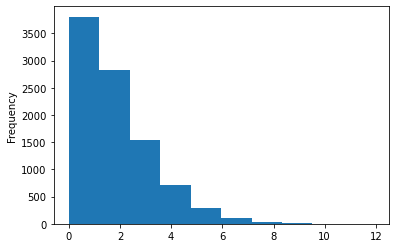

In [150]:
data["CO(GT)"].plot(kind="hist")

<AxesSubplot:xlabel='CO(GT)', ylabel='Density'>

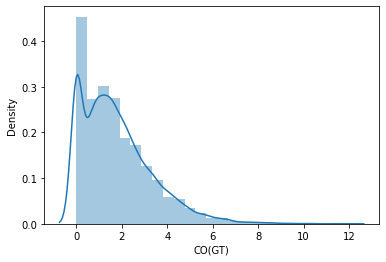

In [203]:
sns.distplot(data['CO(GT)'], bins=25, kde = True)

<AxesSubplot:xlabel='CO(GT)', ylabel='count'>

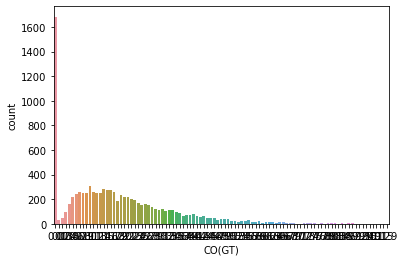

In [193]:
sns.countplot(x='CO(GT)',data=data)

In [155]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(data)

In [159]:
correlation_matrix = data.corr()
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.442803,0.249731,0.670790,0.533061,0.811449,-0.513070,0.723154,0.282080,0.586753,-0.079253,-0.018418,-0.092964
PT08.S1(CO),0.442803,1.000000,0.213250,0.786143,0.922093,0.356291,-0.075630,0.284508,0.823505,0.886880,0.300359,0.417492,0.403123
NMHC(GT),0.249731,0.213250,1.000000,0.198346,0.170037,-0.003611,-0.033366,0.099541,0.196691,0.155224,-0.025205,-0.020121,-0.071580
C6H6(GT),0.670790,0.786143,0.198346,1.000000,0.926265,0.543665,-0.457762,0.402581,0.734014,0.862751,0.275852,0.074847,0.261013
PT08.S2(NMHC),0.533061,0.922093,0.170037,0.926265,1.000000,0.419047,-0.240806,0.334108,0.855763,0.903060,0.400031,0.215377,0.393508
NOx(GT),0.811449,0.356291,-0.003611,0.543665,0.419047,1.000000,-0.514602,0.795888,0.068429,0.553223,-0.268778,0.079334,-0.210622
PT08.S3(NOx),-0.513070,-0.075630,-0.033366,-0.457762,-0.240806,-0.514602,1.000000,-0.440202,-0.002102,-0.352407,0.092534,0.223613,0.068493
NO2(GT),0.723154,0.284508,0.099541,0.402581,0.334108,0.795888,-0.440202,1.000000,0.010185,0.439057,-0.195749,-0.125245,-0.324221
PT08.S4(NO2),0.282080,0.823505,0.196691,0.734014,0.855763,0.068429,-0.002102,0.010185,1.000000,0.694715,0.641916,0.291896,0.719606
PT08.S5(O3),0.586753,0.886880,0.155224,0.862751,0.903060,0.553223,-0.352407,0.439057,0.694715,1.000000,0.149302,0.318989,0.259548


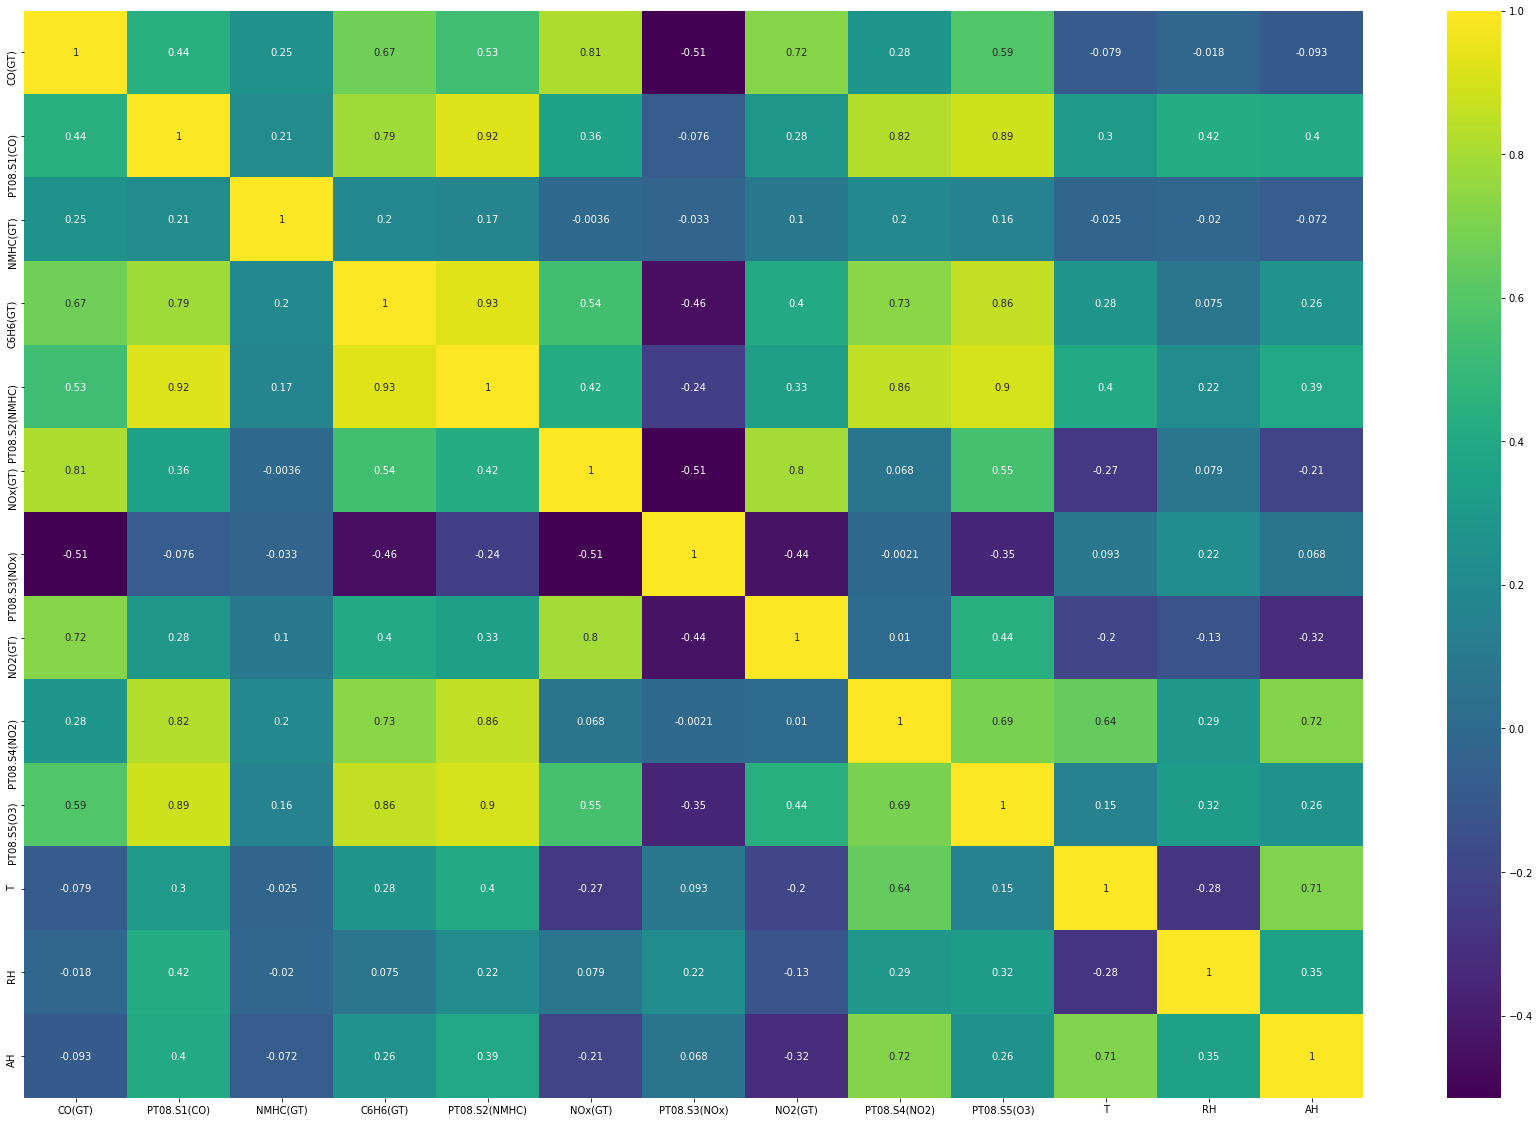

In [166]:
correl_matrix = data.corr()
correlation_feature = correl_matrix.index
plt.figure(figsize=(30,20))
h = sns.heatmap(data[correlation_feature].corr(),annot=True, cmap='viridis')

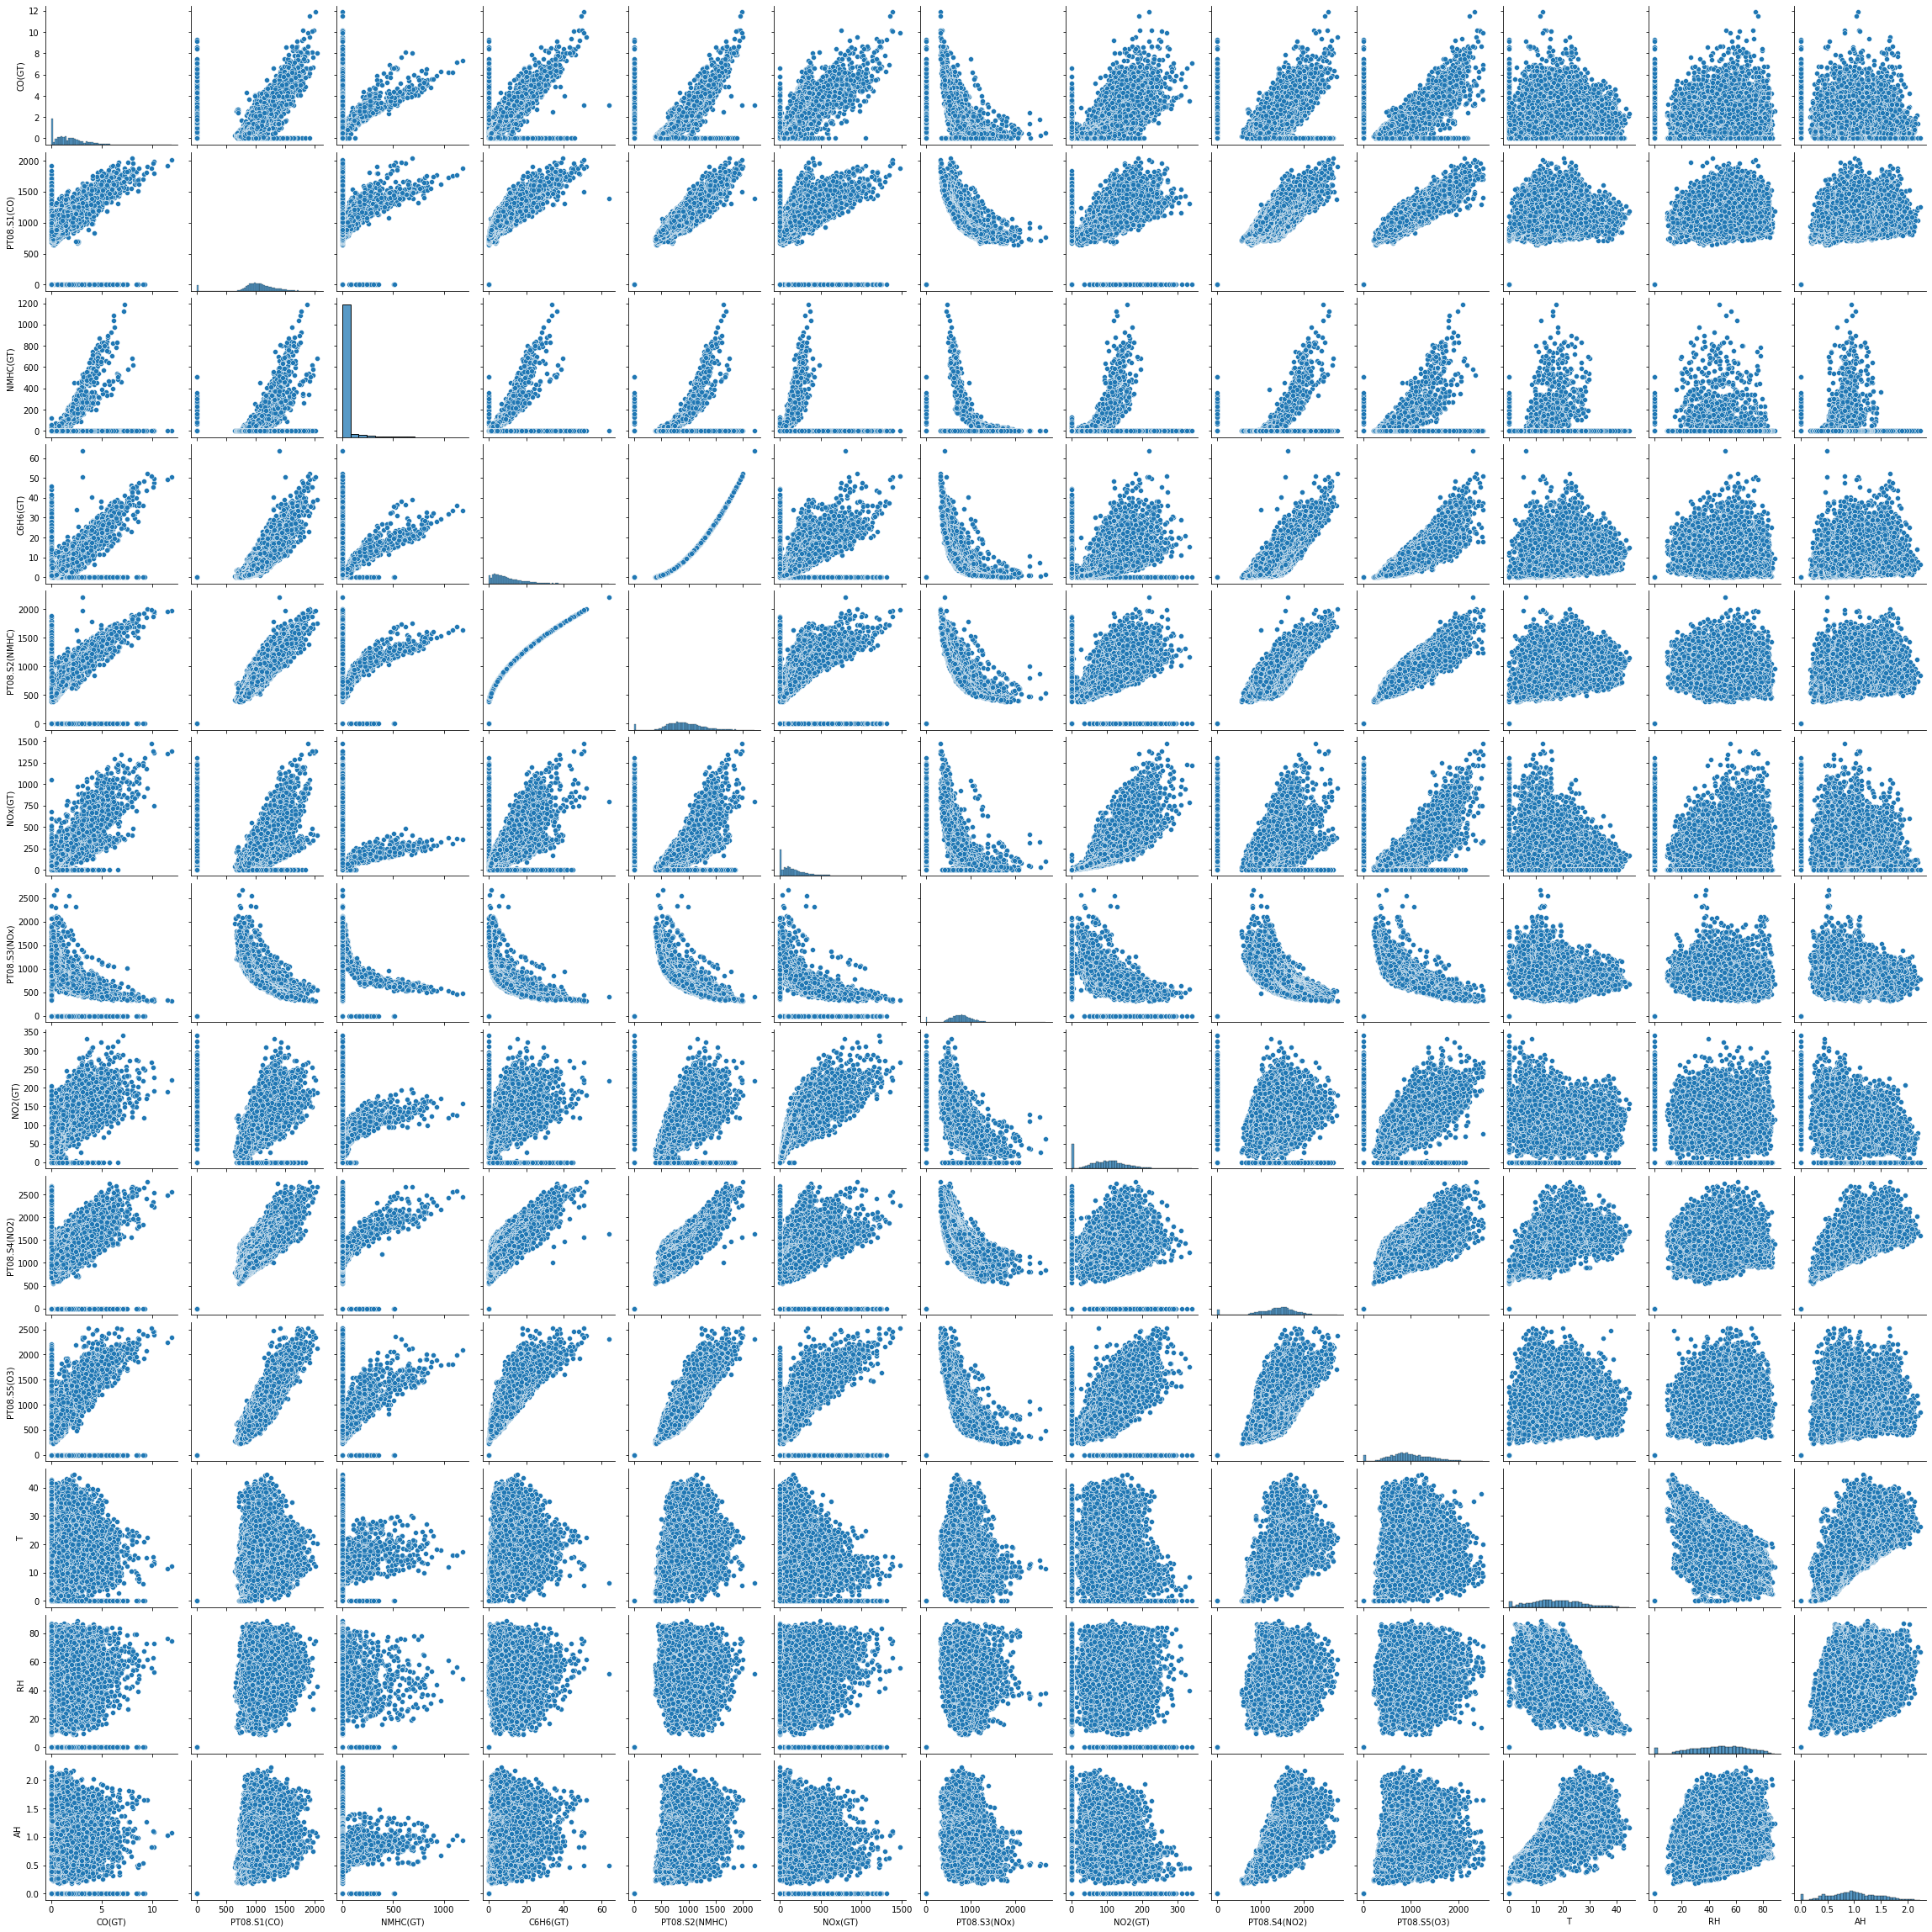

In [167]:
sns.pairplot(data)

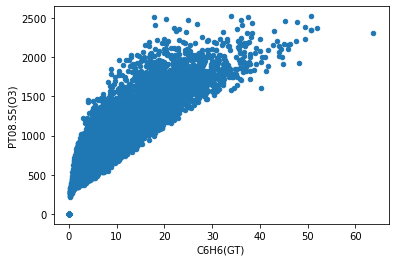

In [168]:
data.plot(kind='scatter', x='C6H6(GT)',y='PT08.S5(O3)')
plt.show()

<AxesSubplot:ylabel='Frequency'>

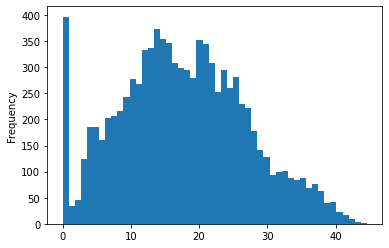

In [169]:
data["T"].plot.hist(bins=50)

### Hence we can conclude that highest correlation is between T, RH, -C6H6 with .96, .92 and so on

# FINAL PREDICTION

In [170]:
feature = data
feature =feature.drop('Date',axis =1)
feature =feature.drop('Time',axis =1)
feature =feature.drop('C6H6(GT)',axis =1)

In [171]:
feature.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## labelling the columns

In [172]:
label = data['C6H6(GT)']

In [173]:
label.head()

0    11.881723
1     9.397165
2     8.997817
3     9.228796
4     6.518224
Name: C6H6(GT), dtype: float64

## Splitting the dataset into test and train datasets

In [174]:
X_train, X_test, y_train, y_test = train_test_split(feature,label,test_size = .3)

## Shape of X_train & Y_train 

In [175]:
X_train.shape, y_train.shape

((6549, 12), (6549,))

## Shape of X_test & Y_test

In [176]:
X_test.shape, y_test.shape

((2808, 12), (2808,))

## Performing Linear Regression on the datasets

In [177]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [178]:
lr.score(X_test, y_test)

0.9598391016974813

## Checking the prediction value after Using the Linear regression machine algorithm technique

In [179]:
y_predict = lr.predict(X_test)
y_predict

array([22.03273825,  4.81592157,  8.40874734, ...,  3.96667976,
       13.53855919,  9.56675284])

## Printing the coefficients: 

### the correlation value matrix is

In [180]:
lr.coef_ 

array([ 4.62282107e-01, -3.98475162e-03,  2.65427839e-04,  2.10959073e-02,
        5.42440620e-03, -2.87417432e-03, -1.97308039e-02,  5.14674437e-03,
       -6.88382910e-05, -2.75004486e-01, -1.04991731e-01,  1.63641411e+00])

## The value for mean squared error is 

In [181]:
from sklearn.metrics import mean_squared_error, r2_score  
print('the value of mean sqaured error is:', mean_squared_error(y_test, y_predict))


the value of mean sqaured error is: 2.230616260771707


In [182]:
print('the coefficient of determination is : ',r2_score(y_test, y_predict))

the coefficient of determination is :  0.9598391016974813


In [183]:
print('the R sqauared value is : ', r2_score(y_test, y_predict))

the R sqauared value is :  0.9598391016974813
